1. Split the raw data into train and validation, so that I can use validation data to create final pipeline and process it there.
2. As I didn't save the best model, I will train it once again and save the parameters for final pipeline creation.

## Split the Raw Data into train and validation

In [1]:
import numpy as np
import pandas as pd
import joblib
import os

In [2]:
# Load the train data into dataframe
Provider = pd.read_csv("archive/Train-1542865627584.csv")
Beneficiary = pd.read_csv("archive/Train_Beneficiarydata-1542865627584.csv")
Inpatient = pd.read_csv("archive/Train_Inpatientdata-1542865627584.csv")
Outpatient = pd.read_csv("archive/Train_Outpatientdata-1542865627584.csv")

In [3]:
from sklearn.model_selection import train_test_split
# split the provider data into train and validation
Train_Provider, Validation_Provider = train_test_split(Provider, test_size=0.2, random_state=42, stratify=Provider['PotentialFraud'])
Train_Provider = Train_Provider.sort_index(axis=0)
Validation_Provider = Validation_Provider.sort_index(axis=0)

In [4]:
Train_Provider.head(2)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes


In [5]:
Validation_Provider.head(2)

,Provider,PotentialFraud
3,PRV51005,Yes
5,PRV51008,No


In [6]:
print(Train_Provider.shape)
print(Validation_Provider.shape)

(4328, 2)
(1082, 2)


In [7]:
# save the train and validation provider into csv file
Train_Provider.to_csv('Train_Provider.csv', index=False)
Validation_Provider.to_csv('Validation_Provider.csv', index=False)

### Create train and validation Inpatient data

In [8]:
common_rows_tr_ip = Inpatient.Provider.isin(Train_Provider.Provider)
Train_Inpatient = Inpatient[common_rows_tr_ip]
Train_Inpatient = Train_Inpatient.sort_index(axis=0)

common_rows_val_ip = Inpatient.Provider.isin(Validation_Provider.Provider)
Validation_Inpatient = Inpatient[common_rows_val_ip]
Validation_Inpatient = Validation_Inpatient.sort_index(axis=0)

In [9]:
Train_Inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


In [10]:
Validation_Inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,NaN,2008-12-29,...,4019,4111,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN


In [11]:
print(Train_Inpatient.shape)
print(Validation_Inpatient.shape)

(31496, 30)
(8978, 30)


In [12]:
# save the train and inpatient provider into csv file
Train_Inpatient.to_csv('Train_Inpatient.csv', index=False)
Validation_Inpatient.to_csv('Validation_Inpatient.csv', index=False)

### Create train and validation Outpatient data

In [13]:
common_rows_tr_op = Outpatient.Provider.isin(Train_Provider.Provider)
Train_Outpatient = Outpatient[common_rows_tr_op]
Train_Outpatient = Train_Outpatient.sort_index(axis=0)

common_rows_val_op = Outpatient.Provider.isin(Validation_Provider.Provider)
Validation_Outpatient = Outpatient[common_rows_val_op]
Validation_Outpatient = Validation_Outpatient.sort_index(axis=0)

In [14]:
Train_Outpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380


In [15]:
Validation_Outpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
21,BENE11005,CLM605760,2009-09-30,2009-10-20,PRV54064,50,PHY419180,NaN,PHY419180,71944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200,NaN
33,BENE11011,CLM347780,2009-05-08,2009-05-08,PRV51012,50,PHY429635,NaN,PHY322331,37500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37611


In [16]:
print(Train_Outpatient.shape)
print(Validation_Outpatient.shape)

(392939, 27)
(124798, 27)


In [17]:
# save the train and outpatient provider into csv file
Train_Outpatient.to_csv('Train_Outpatient.csv', index=False)
Validation_Outpatient.to_csv('Validation_Outpatient.csv', index=False)

### Create train and validation Beneficiary data

In [18]:
Train_Outpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380


In [19]:
bene_tr_ip = list(Train_Inpatient['BeneID'])
bene_tr_op = list(Train_Outpatient['BeneID'])
bene_tr = set(bene_tr_ip + bene_tr_op)

bene_val_ip = list(Validation_Inpatient['BeneID'])
bene_val_op = list(Validation_Outpatient['BeneID'])
bene_val = set(bene_val_ip + bene_val_op)

In [20]:
# get the BeneID associated with train data
common_rows_tr_bene = Beneficiary.BeneID.isin(bene_tr)
Train_Beneficiary = Beneficiary[common_rows_tr_bene]
Train_Beneficiary = Train_Beneficiary.sort_index(axis=0)

# get the BeneID associated with test data
common_rows_val_op = Beneficiary.BeneID.isin(bene_val)
Validation_Beneficiary = Beneficiary[common_rows_val_op]
Validation_Beneficiary = Validation_Beneficiary.sort_index(axis=0)

In [21]:
Train_Beneficiary.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50


In [22]:
Validation_Beneficiary.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
10,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,1,1,2,2,1,1,5000,1068,250,320


In [23]:
print(Train_Beneficiary.shape)
print(Validation_Beneficiary.shape)

(124969, 25)
(61836, 25)


In [24]:
# save the train and outpatient beneficiary into csv file
Train_Beneficiary.to_csv('Train_Beneficiary.csv', index=False)
Validation_Beneficiary.to_csv('Validation_Beneficiary.csv', index=False)

## Train best model and save parameters for final prediction

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc , f1_score
from sklearn.metrics import confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import random

In [26]:
# Read data from stored csv files
import pandas as pd
Final_Dataset_Provider_Train = pd.read_csv('Final_Train.csv')
columns_to_drop = ['Unnamed: 0', 'Unnamed: 0.1']
Final_Dataset_Provider_Train = Final_Dataset_Provider_Train.drop(columns=[col for col in columns_to_drop if col in Final_Dataset_Provider_Train.columns], axis=1)

In [27]:
# Split your whole data into train and test(80-20)
from sklearn.model_selection import train_test_split
Final_Dataset_Provider_Tr, Final_Dataset_Provider_val = train_test_split(Final_Dataset_Provider_Train, test_size=0.2,
                               random_state=42,stratify=Final_Dataset_Provider_Train['PotentialFraud'])
Final_Dataset_Provider_Tr.shape, Final_Dataset_Provider_val.shape

((4328, 247), (1082, 247))

In [28]:
# Seperate dependent and independent variables
x_train = Final_Dataset_Provider_Tr.drop(axis=1,columns=['Provider','PotentialFraud'])
y_train = Final_Dataset_Provider_Tr['PotentialFraud']
x_train.shape, y_train.shape

((4328, 245), (4328,))

In [29]:
# Seperate dependent and independent variables
x_validation_provider_labels = Final_Dataset_Provider_val[['Provider','PotentialFraud']]
x_validation = Final_Dataset_Provider_val.drop(columns=['Provider','PotentialFraud'],axis=1)
y_validation = Final_Dataset_Provider_val['PotentialFraud']
x_validation.shape, y_validation.shape

((1082, 245), (1082,))

In [30]:
from sklearn.preprocessing import StandardScaler
# Standardize the data (train and test)
standard_scaler = StandardScaler()
standard_scaler.fit(x_train)
x_tr = standard_scaler.transform(x_train)
x_val = standard_scaler.transform(x_validation)

# convert pandas.core.series.Series to numpy.ndarray
y_tr = y_train.to_numpy()
y_val = y_validation.to_numpy()

In [31]:
# Now, in the 80% train set, split the train set into D1 and D2.(50-50)
x_d1, x_d2, y_d1, y_d2 = train_test_split(x_tr, y_tr, test_size=0.5,random_state=42,stratify=y_tr)
x_d1.shape, x_d2.shape, y_d1.shape, y_d2.shape

((2164, 245), (2164, 245), (2164,), (2164,))

In [32]:
from sklearn.metrics import roc_curve, auc , f1_score
import matplotlib.pyplot as plt
def pred_prob(clf, data):
    # predicts the probabability of class label using the model
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

def draw_roc(train_fpr, train_tpr, test_fpr, test_tpr):
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc))
    plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc))
    plt.legend()
    plt.xlabel("False Positive Rate(FPR)", size = 14)
    plt.ylabel("True Positive Rate(TPR)", size = 14)
    plt.title("Area Under Curve", size = 16)
    plt.grid(visible=True, which='major', color='g', linestyle='-')
    plt.show()
    
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
#     print("max(tpr*(1-fpr)) = ", max(tpr*(1-fpr)), "for threshold = ", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [33]:
from sklearn.metrics import confusion_matrix
def draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred):
    # Confusion matrix for train and test dataset
    fig, ax = plt.subplots(1,2, figsize=(20,6))

    train_prediction = predict_with_best_t(y_train_pred, best_t)
    cm = confusion_matrix(y_train, train_prediction)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax[0])
    ax[0].set_title('Train Dataset Confusion Matrix', size = 16)
    ax[0].set_xlabel("Predicted Label", size = 14)
    ax[0].set_ylabel("Actual Label", size = 14)

    test_prediction = predict_with_best_t(y_test_pred, best_t)
    cm = confusion_matrix(y_test, test_prediction)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax[1])
    ax[1].set_title('Test Dataset Confusion Matrix', size = 16)
    ax[1].set_xlabel("Predicted Label", size = 14)
    ax[1].set_ylabel("Actual Label", size = 14)
    plt.grid()
    plt.show()
    
    return train_prediction, test_prediction

In [34]:
def validate_model(clf, x_train, x_test, y_train, y_test):
    # predict the probability of train data
    y_train_pred = pred_prob(clf, x_train)
    # predict the probability of test data
    y_test_pred = pred_prob(clf, x_test)
    # calculate tpr, fpr for diffeent thresholds using roc_curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
    
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    print("Train AUC = ", train_auc)
    test_auc = auc(test_fpr, test_tpr)
    print("Test AUC = ", test_auc)
    
    draw_roc(train_fpr, train_tpr, test_fpr, test_tpr)
    
    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
    
    train_prediction, test_prediction = draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred)
    
    train_f1_score = f1_score(y_train, train_prediction)
    test_f1_score = f1_score(y_test, test_prediction)
    
    return test_auc, test_f1_score, best_t

In [35]:
# define a function to randomly sample data from dataset
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
import numpy as np
def row_col_sampling(x, y):
    total_row_count = x.shape[0]
    total_col_count = x.shape[1]
    # in sampled data i want to keep minimum 40% to maximum 60% number of rows
    sampled_row_count_min = round(total_row_count * 0.4)
    sampled_row_count_max = round(total_row_count * 0.6)
    # in a single dataset the rows should be unique, so setting "replace=False"
    sampled_row_indices = np.random.choice(total_row_count, np.random.randint(sampled_row_count_min,
                                                                              sampled_row_count_max),replace=False)
    sampled_row_indices = np.sort(sampled_row_indices)
    
    sampled_col_count_min = round(total_col_count * 0.4)
    sampled_col_count_max = round(total_col_count * 0.6)
    sampled_col_indices = np.random.choice(total_col_count, np.random.randint(sampled_col_count_min,
                                                                              sampled_col_count_max),replace=False)
    sampled_col_indices = np.sort(sampled_col_indices)
    # now select the sampled rows and columns from the input data
    
    #print(len(sampled_row_indices), len(sampled_col_indices))
    x_sampled = x[sampled_row_indices[:,None], sampled_col_indices]
    y_sampled = y[sampled_row_indices]
    #print(x_sampled.shape)
    
    return x_sampled, y_sampled, sampled_row_indices, sampled_col_indices

In [36]:
def create_k_dataset(x_tr, x_te, y_tr, y_te, k):
    x_tr_list = []
    y_tr_list = []
    x_te_list = []
    # y_te_list = []
    sampled_col_indices_list = []
    for i in range(k):
        x_sampled, y_sampled, sampled_row_indices, sampled_col_indices = row_col_sampling(x_tr, y_tr)
        x_tr_list.append(x_sampled)
        y_tr_list.append(y_sampled)
        x_te_list.append(x_te[:,sampled_col_indices])
        # y_te_list.append(y_te)
        sampled_col_indices_list.append(sampled_col_indices)
    return x_tr_list, y_tr_list, x_te_list, y_te, sampled_col_indices_list

In [37]:
# define a function to train base models
def train_model(x, y):
    
    model_count = 9
    # pick a model randomly and train it
    m = random.randint(1, model_count)
    if m == 1:
        model = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 50, min_samples_split = 100)
        model = model.fit(x, y)
    elif m == 2:
        model = LogisticRegression(C=0.001,penalty="l2")
        model = model.fit(x, y)
    elif m == 3:
        model = svm.SVC(kernel='linear')
        model = CalibratedClassifierCV(model)
        model = model.fit(x, y)
    elif m == 4:
        model = svm.SVC(kernel='rbf')
        model = CalibratedClassifierCV(model)
        model = model.fit(x, y)
    elif m == 5:
        model = svm.SVC(kernel='poly')
        model = CalibratedClassifierCV(model)
        model = model.fit(x, y)
    elif m == 6:
        model = svm.SVC(kernel='sigmoid')
        model = CalibratedClassifierCV(model)
        model = model.fit(x, y)
    elif m == 7:
        model = XGBClassifier(learning_rate=0.1, max_delta_step=0, max_depth=10)
        model = model.fit(x, y)
    elif m == 8:
        model = GaussianNB()
        model = model.fit(x, y)
    else:
        model = RandomForestClassifier(n_estimators=400, min_samples_split=10, max_features='sqrt', max_depth=10, random_state=42)
        model = model.fit(x, y)
        
    return(model)

In [38]:
def train_k_base_learners(x_tr_list, y_tr_list, x_te_list, k):
    # take a empty list to store k models
    model_list = []
    for i in range(k):
        # train using train_model function and store in a list
        trained_model = train_model(x_tr_list[i], y_tr_list[i])
        model_list.append(trained_model)
    
    base_model_prediction_list = []
    for j in range(k):
        # predict and store in a list
        y_pred = model_list[j].predict_proba(x_te_list[j])[:,1]
        base_model_prediction_list.append(y_pred)

    x_tr_meta_model = np.vstack(base_model_prediction_list).transpose()

    return x_tr_meta_model, model_list

In [39]:
# create 100 sampled dataset
k = 100
x_tr_list_d1, y_tr_list_d1, x_te_list_d2, y_te_d2, sampled_col_indices_list = create_k_dataset(x_d1, x_d2, y_d1, y_d2, k)
# train base learners with each samples dataset
x_tr_meta_model, base_model_list = train_k_base_learners(x_tr_list_d1, y_tr_list_d1, x_te_list_d2, k)

In [40]:
# pass x_val through base learners to generate validation data for meta model
pred_data_list = []
for i in range(len(base_model_list)):
    x_val_base_learner = x_val[:, sampled_col_indices_list[i]]
    # print(x_val_.shape)
    pred_data = base_model_list[i].predict_proba(x_val_base_learner)[:,1]
    # pred_data = model_list[i].predict(x_val_)
    pred_data_list.append(pred_data)
x_val_meta_model = np.vstack(pred_data_list).transpose()

In [41]:
random_forest = RandomForestClassifier(n_estimators=200, min_samples_split=2, max_features='sqrt', max_depth=5, random_state=42)
random_forest.fit(x_tr_meta_model, y_te_d2)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

Train AUC =  0.9835639527255478
Test AUC =  0.9626568161403296


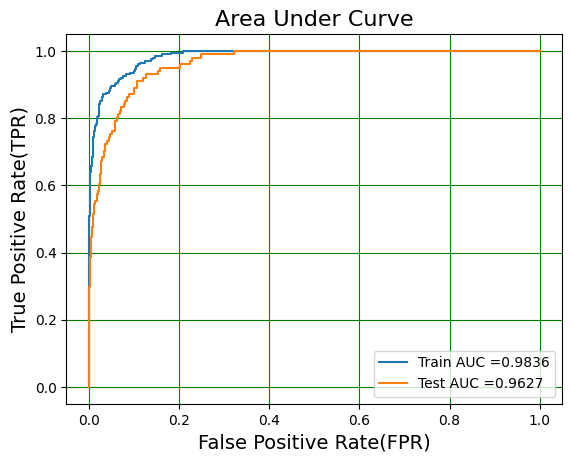

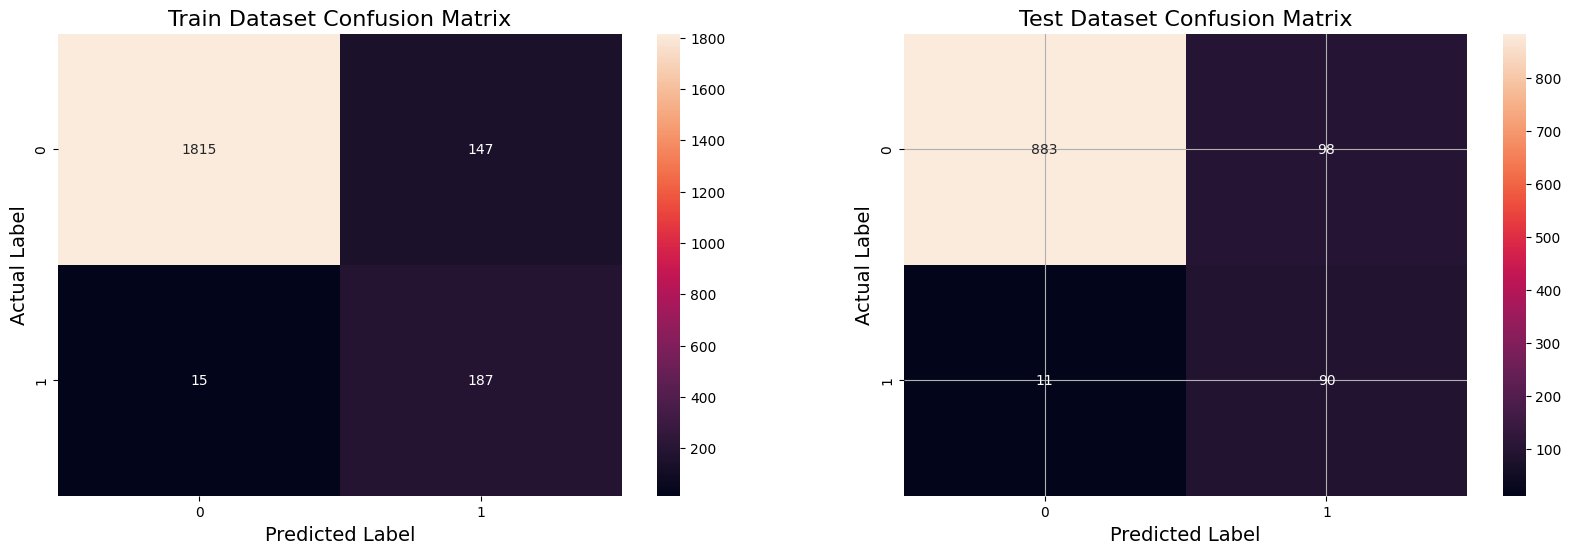

Best Threshold = 0.1753
Model AUC is : 0.9627
Model F1 Score is : 0.6228


In [42]:
# Validate RF model
test_auc, test_f1_score, best_t = validate_model(random_forest, x_tr_meta_model, x_val_meta_model, y_te_d2, y_val)

print("Best Threshold = {:.4f}".format(best_t))
print("Model AUC is : {:.4f}".format(test_auc))
print("Model F1 Score is : {:.4f}".format(test_f1_score))

In [43]:
# save models and required parameters to disk to create the final pipeline
joblib.dump(sampled_col_indices_list, 'sampled_col_indices_list.pkl')
joblib.dump(base_model_list, 'base_model_list.pkl')
joblib.dump(random_forest, 'random_forest.pkl')
joblib.dump(best_t, 'best_t.pkl')

['best_t.pkl']